### Breat Cancer Prediction

#### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Machine Learning Modules from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, make_pipeline

#### Import Dataset

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ADMIN\Dropbox\PC\Desktop\wbc.csv',header = None, names = ['ID','Diagnosis','radius1','texture1',
                 'perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1',                                                                    
                  'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2',
                  'fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',                                                                   
                   'symmetry3','fractal_dimension3'])

#### Explore Dataset

In [4]:
df.head(100)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [6]:
df.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [7]:
df.Diagnosis.value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

<AxesSubplot:>

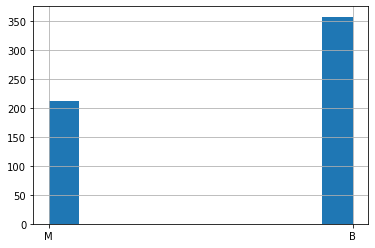

In [8]:
df.Diagnosis.hist()

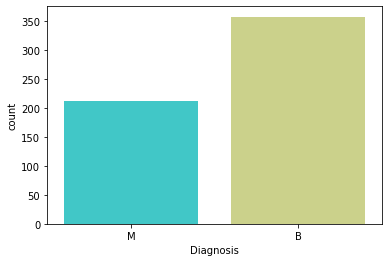

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='Diagnosis',data=df,palette='rainbow')
plt.show()
plt.savefig('count_plot')

#### Feature Engineering

In [10]:
# Label Encoding
# encoding the Diagnosis category status
df['M'] = df.Diagnosis.map(lambda Diagnosis: 1 if Diagnosis == "M" else 0)

In [11]:
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [12]:
df.tail(100)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,M
469,911366,B,11.620,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,...,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270,0
470,9113778,B,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,...,25.62,70.88,385.2,0.12340,0.15420,0.12770,0.06560,0.3174,0.08524,0
471,9113816,B,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,...,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639,0
472,911384,B,14.920,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,...,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273,0
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1
567,927241,M,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,1


In [13]:
df.rename(columns={'M':'Malignant'},inplace = True)
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Malignant
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [14]:
cols = ['ID','Diagnosis']
df.drop(cols, axis=1, inplace=True)

### Exploratory Data Analysis

In [15]:
# Split the dataset into Independent and Dependent Variables
X = df.loc[:,df.columns != 'Malignant']
y = df['Malignant']

In [16]:
df.Malignant.value_counts()

0    357
1    212
Name: Malignant, dtype: int64

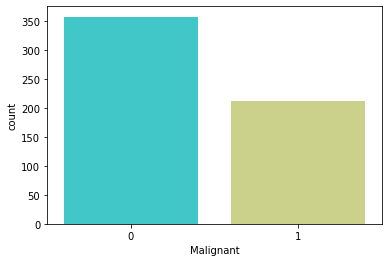

<Figure size 432x288 with 0 Axes>

In [17]:
sns.countplot(x='Malignant',data=df,palette='rainbow')
plt.show()
plt.savefig('count_plot')

### Feature Selection

#### WOE

In [18]:
# Split the dataset into Independent and Dependent Variables
X = df.loc[:,df.columns != 'Malignant']
y = df['Malignant']

In [19]:
pip install xverse 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow>=6.2.0 in c:\programdata\anaconda3\lib\site-packages (from matplotlib>=3.0.3->xverse) (8.2.0)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.24.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:


In [20]:
from xverse.ensemble import VotingSelector

In [21]:
clf = VotingSelector(minimum_votes=2)
clf.fit(X, y)

VotingSelector(minimum_votes=2, no_of_features=15,
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [22]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,perimeter3,4.982785,0.128022,0.133980,0.070875,34.438091,0.000000
1,radius3,4.882253,0.086086,0.994062,0.072095,34.124937,0.000000
2,area3,4.871686,0.094712,0.000000,0.086192,35.043882,0.007158
3,concave_points3,4.762509,0.118576,0.775672,0.086444,46.341648,0.000000
4,concave_points1,4.487473,0.085076,0.491778,0.094276,52.405743,0.000000
5,perimeter1,3.662035,0.073519,0.000000,0.065457,26.528902,-0.065147
6,radius1,3.426502,0.035395,-1.016279,0.065359,24.897293,0.000000
7,concavity1,3.419592,0.065198,0.777679,0.058772,46.186395,0.000000
8,area1,3.419592,0.064876,0.000000,0.052755,29.328594,-0.001255
9,concavity3,3.251215,0.024578,1.507795,0.047359,31.563031,0.000000


In [23]:
# votes 
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,perimeter3,1,1,1,1,1,1,6
1,radius3,1,1,1,1,1,1,6
3,concave_points3,1,1,1,1,1,1,6
4,concave_points1,1,1,1,1,1,1,6
6,radius1,1,1,1,1,1,1,6
7,concavity1,1,1,1,1,1,1,6
9,concavity3,1,1,1,1,1,1,6
12,radius2,1,1,1,1,1,1,6
13,compactness3,1,1,1,1,1,1,6
2,area3,1,1,0,1,1,1,5


In [24]:
# transform your data into important features 

X = clf.transform(X)

In [25]:
X

,perimeter3,radius3,concave_points3,concave_points1,radius1,concavity1,concavity3,radius2,compactness3,area3,perimeter1,area1,area2,texture3,perimeter2,compactness1
0,184.60,25.380,0.2654,0.14710,17.99,0.30010,0.7119,1.0950,0.66560,2019.0,122.80,1001.0,153.40,17.33,8.589,0.27760
1,158.80,24.990,0.1860,0.07017,20.57,0.08690,0.2416,0.5435,0.18660,1956.0,132.90,1326.0,74.08,23.41,3.398,0.07864
2,152.50,23.570,0.2430,0.12790,19.69,0.19740,0.4504,0.7456,0.42450,1709.0,130.00,1203.0,94.03,25.53,4.585,0.15990
3,98.87,14.910,0.2575,0.10520,11.42,0.24140,0.6869,0.4956,0.86630,567.7,77.58,386.1,27.23,26.50,3.445,0.28390
4,152.20,22.540,0.1625,0.10430,20.29,0.19800,0.4000,0.7572,0.20500,1575.0,135.10,1297.0,94.44,16.67,5.438,0.13280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,166.10,25.450,0.2216,0.13890,21.56,0.24390,0.4107,1.1760,0.21130,2027.0,142.00,1479.0,158.70,26.40,7.673,0.11590
565,155.00,23.690,0.1628,0.09791,20.13,0.14400,0.3215,0.7655,0.19220,1731.0,131.20,1261.0,99.04,38.25,5.203,0.10340
566,126.70,18.980,0.1418,0.05302,16.60,0.09251,0.3403,0.4564,0.30940,1124.0,108.30,858.1,48.55,34.12,3.425,0.10230
567,184.60,25.740,0.2650,0.15200,20.60,0.35140,0.9387,0.7260,0.86810,1821.0,140.10,1265.0,86.22,39.42,5.772,0.27700


In [26]:
final_dataset =  pd.concat([X, df.Malignant], axis=1)


In [27]:
final_dataset

,perimeter3,radius3,concave_points3,concave_points1,radius1,concavity1,concavity3,radius2,compactness3,area3,perimeter1,area1,area2,texture3,perimeter2,compactness1,Malignant
0,184.60,25.380,0.2654,0.14710,17.99,0.30010,0.7119,1.0950,0.66560,2019.0,122.80,1001.0,153.40,17.33,8.589,0.27760,1
1,158.80,24.990,0.1860,0.07017,20.57,0.08690,0.2416,0.5435,0.18660,1956.0,132.90,1326.0,74.08,23.41,3.398,0.07864,1
2,152.50,23.570,0.2430,0.12790,19.69,0.19740,0.4504,0.7456,0.42450,1709.0,130.00,1203.0,94.03,25.53,4.585,0.15990,1
3,98.87,14.910,0.2575,0.10520,11.42,0.24140,0.6869,0.4956,0.86630,567.7,77.58,386.1,27.23,26.50,3.445,0.28390,1
4,152.20,22.540,0.1625,0.10430,20.29,0.19800,0.4000,0.7572,0.20500,1575.0,135.10,1297.0,94.44,16.67,5.438,0.13280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,166.10,25.450,0.2216,0.13890,21.56,0.24390,0.4107,1.1760,0.21130,2027.0,142.00,1479.0,158.70,26.40,7.673,0.11590,1
565,155.00,23.690,0.1628,0.09791,20.13,0.14400,0.3215,0.7655,0.19220,1731.0,131.20,1261.0,99.04,38.25,5.203,0.10340,1
566,126.70,18.980,0.1418,0.05302,16.60,0.09251,0.3403,0.4564,0.30940,1124.0,108.30,858.1,48.55,34.12,3.425,0.10230,1
567,184.60,25.740,0.2650,0.15200,20.60,0.35140,0.9387,0.7260,0.86810,1821.0,140.10,1265.0,86.22,39.42,5.772,0.27700,1


In [28]:
# Final check for correlation between variables
corr = final_dataset.corr()
corr

,perimeter3,radius3,concave_points3,concave_points1,radius1,concavity1,concavity3,radius2,compactness3,area3,perimeter1,area1,area2,texture3,perimeter2,compactness1,Malignant
perimeter3,1.000000,0.993708,0.816322,0.855923,0.965137,0.729565,0.618344,0.719684,0.529408,0.977578,0.970387,0.959120,0.761213,0.365098,0.721031,0.590210,0.782914
radius3,0.993708,1.000000,0.787424,0.830318,0.969539,0.688236,0.573975,0.715065,0.475820,0.984015,0.969476,0.962746,0.757373,0.359921,0.697201,0.535315,0.776454
concave_points3,0.816322,0.787424,1.000000,0.910155,0.744214,0.861323,0.855434,0.531062,0.801080,0.747419,0.771241,0.722017,0.538166,0.359755,0.554897,0.815573,0.793566
concave_points1,0.855923,0.830318,0.910155,1.000000,0.822529,0.921391,0.752399,0.698050,0.667454,0.809630,0.850977,0.823269,0.690299,0.292752,0.710650,0.831135,0.776614
radius1,0.965137,0.969539,0.744214,0.822529,1.000000,0.676764,0.526911,0.679090,0.413463,0.941082,0.997855,0.987357,0.735864,0.297008,0.674172,0.506124,0.730029
concavity1,0.729565,0.688236,0.861323,0.921391,0.676764,1.000000,0.884103,0.631925,0.754968,0.675987,0.716136,0.685983,0.617427,0.299879,0.660391,0.883121,0.696360
concavity3,0.618344,0.573975,0.855434,0.752399,0.526911,0.884103,1.000000,0.380585,0.892261,0.543331,0.563879,0.512606,0.385100,0.368366,0.418899,0.816275,0.659610
radius2,0.719684,0.715065,0.531062,0.698050,0.679090,0.631925,0.380585,1.000000,0.287103,0.751548,0.691765,0.732562,0.951830,0.194799,0.972794,0.497473,0.567134
compactness3,0.529408,0.475820,0.801080,0.667454,0.413463,0.754968,0.892261,0.287103,1.000000,0.438296,0.455774,0.390410,0.283257,0.360832,0.341919,0.865809,0.590998
area3,0.977578,0.984015,0.747419,0.809630,0.941082,0.675987,0.543331,0.751548,0.438296,1.000000,0.941550,0.959213,0.811408,0.345842,0.730713,0.509604,0.733825


<AxesSubplot:>

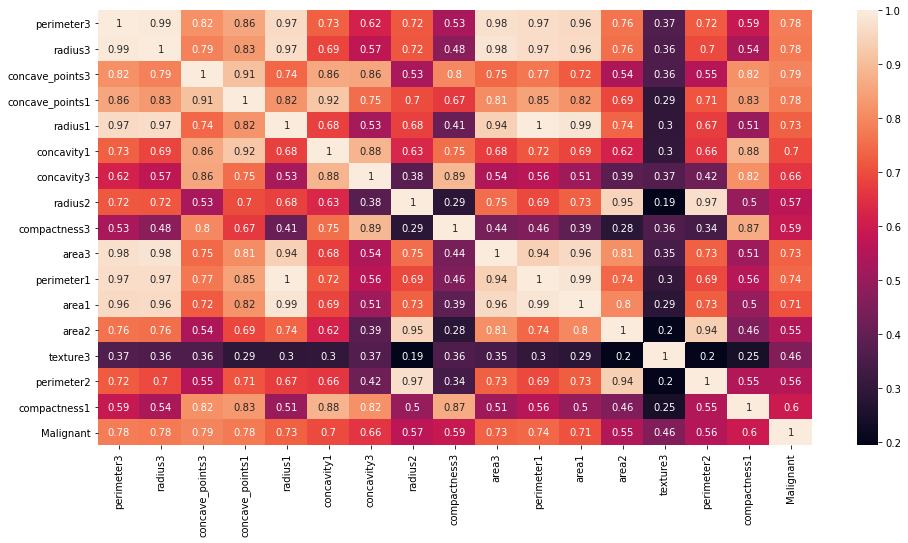

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(final_dataset.corr(), annot=True)

#### Model Selection

In [30]:

# Split the dataset into Independent and Dependent Variables
X = final_dataset.drop('Malignant',axis=1)
y = final_dataset['Malignant']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# check the split / partitioning
X_train.shape

(455, 16)

In [33]:

# sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from pandas import DataFrame

### Logistic Regression

In [34]:
from sklearn.metrics import f1_score,fbeta_score
# Fitting Logistic Regression to the Training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Predicting the Test set results
y_pred = logreg.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967


### Naive Byes

In [35]:
from sklearn.metrics import f1_score,fbeta_score
# Fitting Naive Byes to the Training set:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
0  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967


### Decision Trees

In [36]:
from sklearn.metrics import f1_score,fbeta_score
# Fitting Decision Tree to the Training set:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = tree.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
1  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967
2        Decision Tree  0.947368    0.95122  0.906977  0.928571  0.915493


### Extra Trees

In [37]:
from sklearn.metrics import f1_score,fbeta_score
# Fitting Decision Tree to the Training set:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = etc.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Extra Trees', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
3          Extra Trees  0.973684    0.97619  0.953488  0.964706  0.957944
1  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967
2        Decision Tree  0.947368    0.95122  0.906977  0.928571  0.915493


### Neural Network

In [38]:
from sklearn.metrics import f1_score,fbeta_score
# Fitting Decision Tree to the Training set:
mlp =  MLPClassifier()
mlp.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = mlp.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Neural Network', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
4       Neural Network  0.947368    1.00000  0.860465  0.925000  0.885167
1          Extra Trees  0.973684    0.97619  0.953488  0.964706  0.957944
2  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967
3        Decision Tree  0.947368    0.95122  0.906977  0.928571  0.915493


### Gradient Boosting

In [39]:
# Fitting Decision Tree to the Training set:
gb =  GradientBoostingClassifier()
gb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Gradient Boosting', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
1       Neural Network  0.947368    1.00000  0.860465  0.925000  0.885167
2          Extra Trees  0.973684    0.97619  0.953488  0.964706  0.957944
3  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967
5    Gradient Boosting  0.964912    0.97561  0.930233  0.952381  0.938967
4        Decision Tree  0.947368    0.95122  0.906977  0.928571  0.915493


### Random Forest

In [40]:
# Fitting Random Forest to the Training set:
    
rf = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = rf.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Naive Byes  0.964912    1.00000  0.906977  0.951220  0.924171
1       Neural Network  0.947368    1.00000  0.860465  0.925000  0.885167
2          Extra Trees  0.973684    0.97619  0.953488  0.964706  0.957944
3  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.938967
4    Gradient Boosting  0.964912    0.97561  0.930233  0.952381  0.938967
6        Random Forest  0.964912    0.97561  0.930233  0.952381  0.938967
5        Decision Tree  0.947368    0.95122  0.906977  0.928571  0.915493


#### Extra Trees and Neural Network have the best paramers, however ETC is the chosen model having the best accuracy , f1_score, and recall

#### Fitting the chsoen model into the train set and evaulate the result 

In [41]:
# Fitting Decision Tree to the Training set:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# Predicting the test set result
y_pred = etc.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Extra Trees',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)


         Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Extra Trees  0.973684    0.97619  0.953488  0.964706  0.957944


### Hyperparameter Tunning 

In [42]:
# define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=etc,
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'max_features': None, 'max_depth': 6}


#### K-Fold Validation 

In [43]:
# Validating using k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = etc,
 X = X_train, y = y_train, cv = 10)
print("Extra Trees Classifier Accuracy:%0.2f (+/- %0.2f)"  % (accuracies.mean(),accuracies.std() * 2))

Extra Trees Classifier Accuracy:0.97 (+/- 0.05)


### Model Performance & Evaluation 

##### The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the confusion matrix and some evaluation metrics.The confusion matrix, also known as the error matrix, is used to evaluate the performance of a machine learning model by examining the number of observations that are correctly and incorrectly classified.

#### Confusion Matrix

In [44]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[70,  1],
       [ 3, 40]], dtype=int64)

<AxesSubplot:>

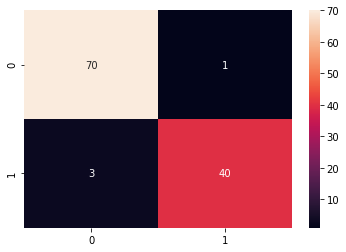

In [45]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

#### Classification Report

In [46]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Save Model for deployment

In [47]:
# install the library 
import joblib

In [48]:
filename = 'Breast_Cancer_Prediction'
model_name = random_search 
joblib.dump(model_name, filename)

['Breast_Cancer_Prediction']